In [1]:
#bfs
import collections
def bfs(graph,root):
    visited = set()
    queue = collections.deque([root])
    visited.add(root)

    while(queue):
        vertex = queue.popleft()
        print(str(vertex)+" ",end=" ")

        for neighbours in graph[vertex]:
            if neighbours not in visited:
                visited.add(neighbours)
                queue.append(neighbours)

if __name__ == "__main__":
    graph = {
        0:[1,2],
        1:[3,4],
        2:[5,6],
        3:[1],
        4:[1],
        5:[2],
        6:[2]
    }
    print("The binary tree traversal is :",end=" ")
    bfs(graph,0)

The binary tree traversal is : 0  1  2  3  4  5  6  

In [ ]:
#dfs
def dfs(graph,start,visited=None):
    if visited is None:
        visited=set()
    
    visited.add(start)
    print(str(start)+" ",end=" ")

    for next in graph[start]:
        if next not in visited:
            dfs(graph,next,visited)

    return visited
if __name__ == "__main__":
    graph = {
        0:[1,2],
        1:[3,4],
        2:[5,6],
        3:[1],
        4:[1],
        5:[2],
        6:[2]
    }
    print("The depth tree traversal is :",end=" ")
    dfs(graph,0)

The depth tree traversal is : 0  1  3  4  2  5  6  

In [3]:
def astar(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set() 
    g = {}
    parents = {}

    g[start_node] = 0
    parents[start_node] = start_node

    while len(open_set) > 0:
        n = None
        for v in open_set:
            if n is None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v

        if n == stop_node or Graph_nodes[n] is None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n is None:
            print("Path does not exist!")
            return None

        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print("Path found:", path)
            return path

        open_set.remove(n)
        closed_set.add(n)

    # Moved outside the while loop
    print("Path does not exist!")
    return None

# Function to get neighbors of a node
def get_neighbors(v):
    return Graph_nodes.get(v, None)

# Heuristic function
def heuristic(n):
    H_dist = {
        'S': 10,
        'A': 4,
        'B': 8,
        'C': 3,
        'D': 6,
        'E': 5,
        'G': 0
    }
    return H_dist.get(n, float('inf'))



if __name__=="__main__":
    Graph_nodes = {
        "S":[("A",2),("B",5)],
        "A":[("C",4),("D",2)],
        "B":[("D",6),("E",3)],
        "C":[("G",7)],
        "D":[("G",1)],
        "E":[("G",5)],
        "G":None
    }
    astar("S","G")

Path found: ['S', 'A', 'D', 'G']


In [16]:
#Candidate elimination algorithm
import csv
with open("enjoySport.csv") as f:
    reader = csv.reader(f)
    data = list(reader)
print("Training data")
for row in data:
    print(row)
print("----------------------------------")
attr_len=len(data[0])-1
print(attr_len)
S=["0"]*attr_len
G=["?"]*attr_len
temp=[]
print("The Hypothesis are")
print("S:",S)
print("G:",G)
for row in data:
    if row[-1]=="yes":
        j=0
        for col in row:
            if col!="yes":
                if col!=S[j] and S[j]=='0':
                    S[j]=col
                elif col!=S[j] and S[j]!="0":
                    S[j]="?"
            j=j+1
        for j in range(0,attr_len):
            for k in temp:
                if k[j]!=S[j] and k[j]!="?":
                    temp.remove(k)
    if row[-1]=="no":
        j=0
        for col in row:
            if col!="no":
                if col!=S[j] and S[j]!="?":
                    G[j]=S[j]
                    temp.append(G)
                    G=["?"]*attr_len
            j=j+1
    print("S=",S)
    if len(temp)==0:
        print("G:",G)
    else:
        print("G:",temp)


Training data
['ï»¿SKY', 'TEMP', 'HUMIDITY', 'WIND', 'WATER', 'FORECAST ', 'ENJOYSPORT']
['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']
----------------------------------
6
The Hypothesis are
S: ['0', '0', '0', '0', '0', '0']
G: ['?', '?', '?', '?', '?', '?']
S= ['0', '0', '0', '0', '0', '0']
G: ['?', '?', '?', '?', '?', '?']
S= ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G: ['?', '?', '?', '?', '?', '?']
S= ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G: ['?', '?', '?', '?', '?', '?']
S= ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
S= ['sunny', 'warm', '?', 'strong', '?', '?']
G: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


In [17]:
# KNN PROGRAM
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd

# Load Iris dataset
iris = datasets.load_iris()
print("Iris Dataset Loaded...\n")

# Print the dataset (features and labels)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print("\nComplete Iris Dataset:")
print(iris_df.to_string(index=False))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Display target labels
print("Target Labels:")
for i in range(len(iris.target_names)):
    print("Label", i, ":", iris.target_names[i])
print("\n")

# Initialize KNN classifier with K=3
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
classifier.fit(x_train, y_train)

# Predict the test data
y_pred = classifier.predict(x_test)

# Display predictions
print("Predictions:\n")
correct = 0
incorrect = 0

for i in range(len(x_test)):
    actual_label = y_test[i]
    predicted_label = y_pred[i]
    status = "Correct" if actual_label == predicted_label else "Wrong"

    if status == "Correct":
        correct += 1
    else:
        incorrect += 1

    print(f"Sample: {x_test[i]}, Actual: {iris.target_names[actual_label]}, "
          f"Predicted: {iris.target_names[predicted_label]} -> {status}")

# Print summary
print("\nSummary:")
print("Total Samples:", len(y_test))
print("Correct Predictions:", correct)
print("Wrong Predictions:", incorrect)
print("Accuracy:", classifier.score(x_test, y_test))


Iris Dataset Loaded...


Complete Iris Dataset:
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
               5.1               3.5                1.4               0.2       0
               4.9               3.0                1.4               0.2       0
               4.7               3.2                1.3               0.2       0
               4.6               3.1                1.5               0.2       0
               5.0               3.6                1.4               0.2       0
               5.4               3.9                1.7               0.4       0
               4.6               3.4                1.4               0.3       0
               5.0               3.4                1.5               0.2       0
               4.4               2.9                1.4               0.2       0
               4.9               3.1                1.5               0.1       0
               5.4               3.7              


Generated Synthetic Dataset (First 10 rows):
       x        y
0.000000 0.352810
0.101010 0.180870
0.202020 0.396396
0.303030 0.746592
0.404040 0.766648
0.505051 0.288396
0.606061 0.759652
0.707071 0.619338
0.808081 0.702319
0.909091 0.871065


C:\Users\nproh\AppData\Local\Temp\ipykernel_18368\47840191.py:73: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\nproh\AppData\Local\Temp\ipykernel_18368\47840191.py:73: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\nproh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nproh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


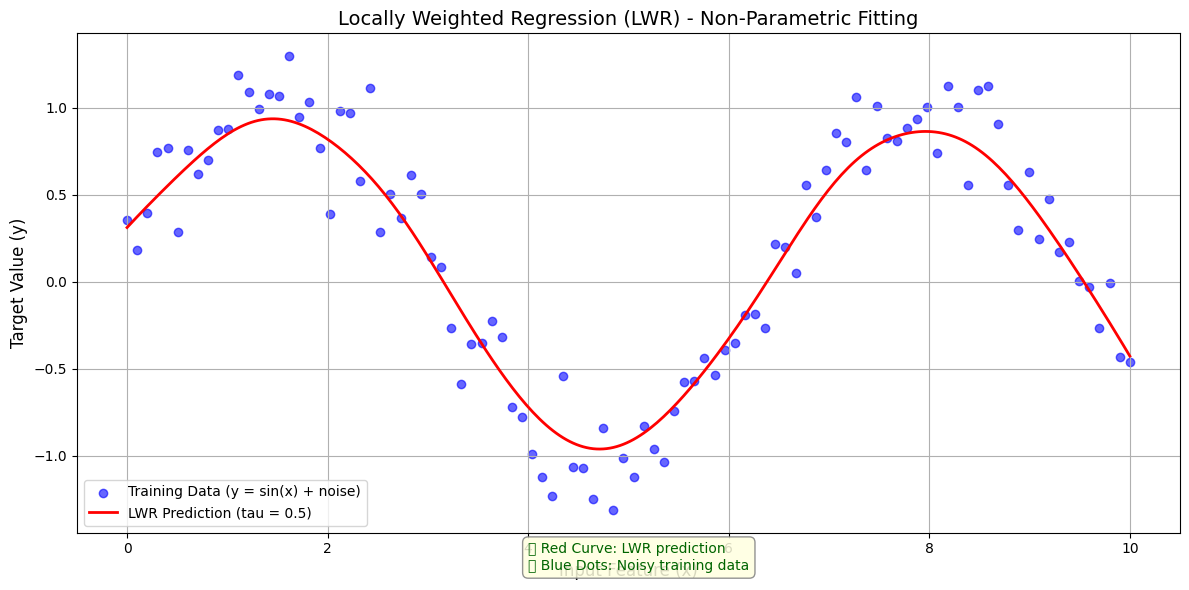

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gaussian Kernel Function for weighting
def kernel(x, x_i, tau):
    return np.exp(-np.sum((x - x_i) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression Function
def locally_weighted_regression(x_query, x, y, tau):
    m = x.shape[0]
    W = np.eye(m)

    for i in range(m):
        W[i, i] = kernel(x_query, x[i], tau)

    XTWX = x.T @ W @ x
    if np.linalg.det(XTWX) == 0:
        theta = np.linalg.pinv(XTWX) @ x.T @ W @ y
    else:
        theta = np.linalg.inv(XTWX) @ x.T @ W @ y

    return x_query @ theta

# Generate synthetic dataset: y = sin(x) + noise
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

# Display the dataset
data_df = pd.DataFrame({'x': x, 'y': y})
print("\nGenerated Synthetic Dataset (First 10 rows):")
print(data_df.head(10).to_string(index=False))

# Add intercept term to x
X = np.vstack((np.ones(len(x)), x)).T

# Query points where we want to estimate y
x_query_vals = np.linspace(0, 10, 300)
X_query = np.vstack((np.ones(len(x_query_vals)), x_query_vals)).T

# Bandwidth parameter (controls smoothness)
tau = 0.5

# Predict values for each query point
y_pred = np.array([locally_weighted_regression(xq, X, y, tau) for xq in X_query])

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Training Data (y = sin(x) + noise)', alpha=0.6)
plt.plot(x_query_vals, y_pred, color='red', label=f'LWR Prediction (tau = {tau})', linewidth=2)

# Enhance plot
plt.title('Locally Weighted Regression (LWR) - Non-Parametric Fitting', fontsize=14)
plt.xlabel('Input Feature (x)', fontsize=12)
plt.ylabel('Target Value (y)', fontsize=12)
plt.grid(True)
plt.legend()

# Better-positioned annotation
plt.annotate(
    "🔴 Red Curve: LWR prediction\n🔵 Blue Dots: Noisy training data",
    xy=(7.5, np.sin(7.5)),
    xytext=(4, -1.5),
    textcoords='data',
    fontsize=10,
    color='darkgreen',
    ha='left',
    va='top',
    bbox=dict(boxstyle='round,pad=0.4', fc='lightyellow', ec='gray', alpha=0.85)
)

plt.tight_layout()
plt.show()


The first 5 values of the dataset:
     Outlook Temperature Humidity  Windy Playtennis
0     Sunny         Hot     High  False         No
1  Overcast        Mild   Normal   True        Yes

The first 5 values of the train data (features):
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1  Overcast        Mild   Normal   True

The first 5 values of train output (target):
 0     No
1    Yes
Name: Playtennis, dtype: object

Now the Train data after encoding:
    Outlook  Temperature  Humidity  Windy
0        1            0         0      0
1        0            1         1      1

Now the Train output after encoding:
 [0 1]

Model Accuracy: 0.0


C:\Users\nproh\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\nproh\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\nproh\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


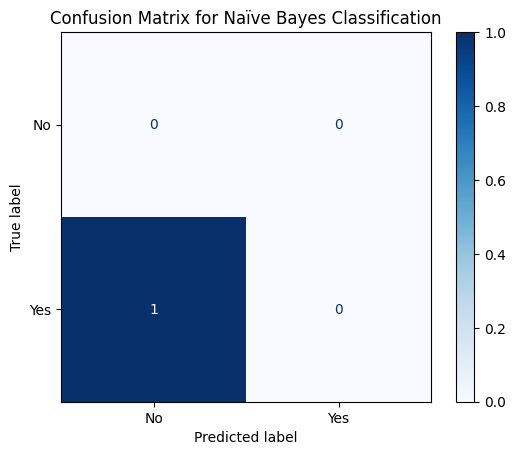

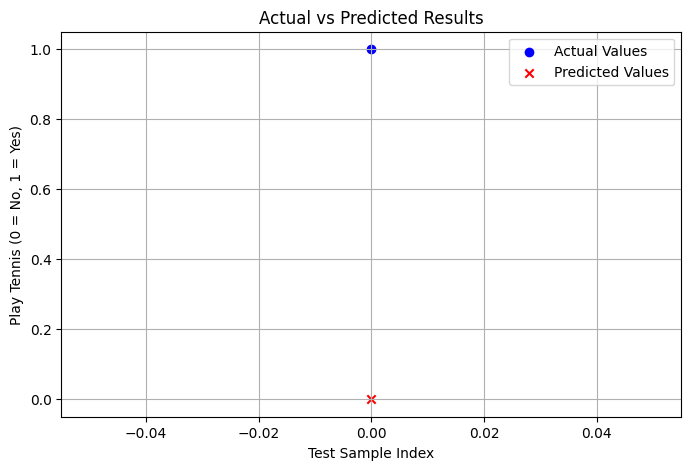

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Data from CSV
data = pd.read_excel('tennis.xlsx')  # Update path if needed
print("The first 5 values of the dataset:\n", data.head())

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]   # Only the last column

# Display first few rows
print("\nThe first 5 values of the train data (features):\n", X.head())
print("\nThe first 5 values of train output (target):\n", y.head())

# Convert categorical variables to numeric using Label Encoding
LE = LabelEncoder()
X['Outlook'] = LE.fit_transform(X['Outlook'])
X['Temperature'] = LE.fit_transform(X['Temperature'])
X['Humidity'] = LE.fit_transform(X['Humidity'])
X['Windy'] = LE.fit_transform(X['Windy'])

# Show transformed features
print("\nNow the Train data after encoding:\n", X.head())

# Encode target variable
y = LE.fit_transform(y)
print("\nNow the Train output after encoding:\n", y)

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Initialize and train Gaussian Naïve Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naïve Bayes Classification")
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Values", marker="o")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted Values", marker="x")
plt.xlabel("Test Sample Index")
plt.ylabel("Play Tennis (0 = No, 1 = Yes)")
plt.title("Actual vs Predicted Results")
plt.legend()
plt.grid(True)
plt.show()
